## Real estate - Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("housing.csv")

In [3]:
housing.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000
1,6.421,9.14,17.8,453600
2,7.185,4.03,17.8,728700
3,6.998,2.94,18.7,701400
4,7.147,5.33,18.7,760200


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       485 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 15.4 KB


In [5]:
housing['RM'].value_counts()

RM
6.127    3
6.405    3
6.417    3
6.167    3
5.713    3
        ..
6.142    1
6.750    1
5.924    1
5.599    1
6.976    1
Name: count, Length: 426, dtype: int64

In [6]:
housing.describe()

,RM,LSTAT,PTRATIO,MEDV
count,485.000000,489.000000,489.000000,4.890000e+02
mean,6.238439,12.939632,18.516564,4.543429e+05
std,0.643660,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.879000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [7]:
%matplotlib inline

In [8]:
#for plotting histogram
#import matplotlib.pyplot as plt
#housing.hist(bins=50,figsize=(20,15))

## Train-Test Splitting

In [9]:
import numpy as np
#for learning purpose
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [10]:
#train_set,test_set = split_train_test(housing,0.2)

In [11]:
#print(f"Rows in train set:{len(train_set)}\nRows in test set:{len(test_set)}\n")

In [12]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)
print(f"Rows in train set:{len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train set:391
Rows in test set:98



In [13]:
#stratified split
#from from sklearn.model_selection import StratifiedShuffleSplit
#split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
#for train_index,test_index in split.split(housing,housing['CHAS']):
#strat_train_set = housing.loc[train_index]
#strat_test_set = housing.loc[test_index]


In [14]:
housing = train_set.copy()

## Looking For Correlations

In [15]:
corr_matrix = housing.corr()

In [16]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.703996
PTRATIO   -0.528776
LSTAT     -0.758349
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

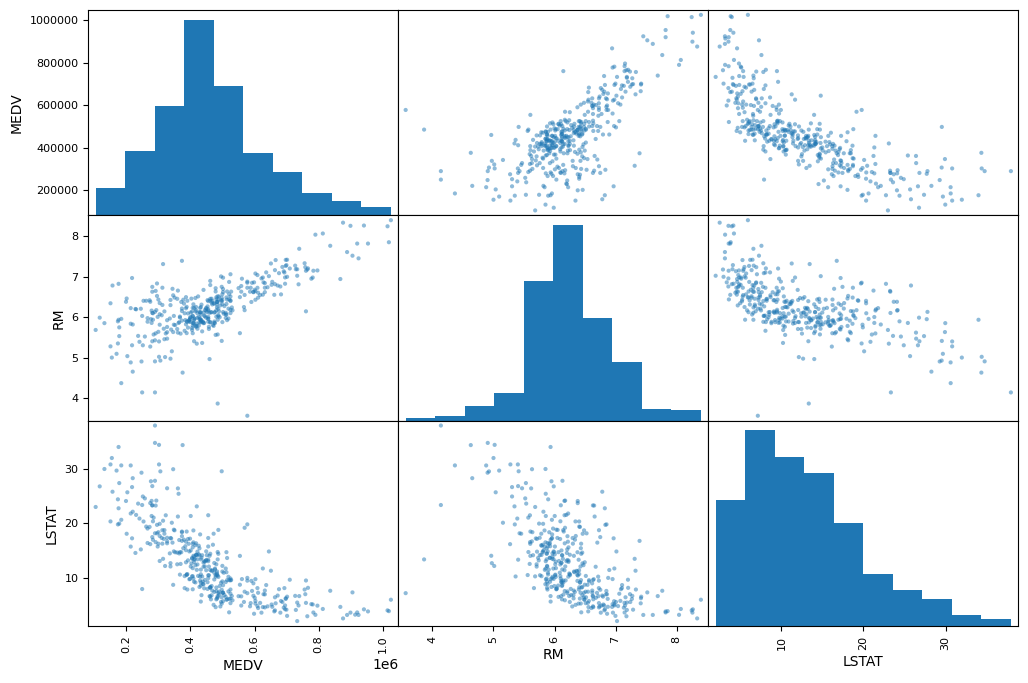

In [17]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","LSTAT"]
scatter_matrix(housing[attributes],figsize = (12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

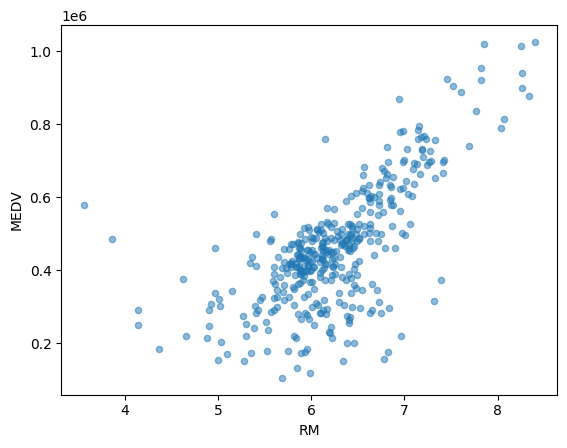

In [18]:
housing.plot(kind='scatter',x="RM",y="MEDV",alpha=0.5)

In [19]:
#scatter points can be removed fayeda of correalation and scatter matrix


## Trying Out Attribute combinations

In [20]:
housing = train_set.drop("MEDV",axis=1)
housing_labels = train_set["MEDV"].copy()

## Missing Attribues

In [21]:
#To take care of missing attributes , you have 3 options:
#1. Get rid of the missing data points
#2. Get rid of the whole attribute
#3. set the value to some value (0 ,mean or median)

In [22]:
a = housing.dropna(subset=['RM']) # option 1
a.shape

(387, 3)

In [23]:
housing.drop("RM",axis=1).shape #option 2
# no RM column and orginal housing dataframe will remain unchanged

(391, 2)

In [24]:
median = housing["RM"].median() # option 3

In [25]:
median

np.float64(6.195)

In [26]:
housing["RM"].fillna(median)
#orginal housing dataframe will remain unchanged

325    5.869
140    6.174
433    6.749
416    6.436
487    6.794
       ...  
106    5.836
270    7.820
348    6.112
435    6.297
102    6.405
Name: RM, Length: 391, dtype: float64

In [27]:
housing.shape

(391, 3)

In [28]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [29]:
imputer.statistics_.shape

(3,)

In [30]:
X= imputer.transform(housing)

In [31]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [32]:
housing_tr.describe()

,RM,LSTAT,PTRATIO
count,391.000000,391.000000,391.000000
mean,6.254910,12.836598,18.441432
std,0.671056,7.127752,2.181947
min,3.561000,1.980000,12.600000
25%,5.886000,7.195000,17.000000
50%,6.195000,11.410000,18.900000
75%,6.629500,16.920000,20.200000
max,8.398000,37.970000,22.000000


 ## Scikit-learn Design

Primarily, three types of objects:
1. Estimators - It estimates some parameter based on a dataset.Eg is Imputer.It has a fit method and transform method.Fit method - fits the dataset and calculates  internal parameters.
2. Transformers - Transform method takes input and returns output based on the learnings from fit().It also has a convenience function call fit_transform() which fits and then transforms.
3. Predictors - LinearRegression model is an example of predictor.fit() and predict() are two common functions.It also gives score() function which will evaluate the predictions.


## Feature Scaling

two types of feature scaling methods:
1. Min-max scaling(Normalization)
   (value - min)/(max-min)
   Sklearn provides a class called MinMaxScaler for this
2. Standardization
   (value - mean)/std
   Sklearn provieds a class called  StandardScaler

## Creating Pipeline

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),#add as many as you want in pipeline
    ('std_scaler',StandardScaler()),
])

In [34]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [35]:
housing_num_tr.shape

(391, 3)

## Selecting a desired model

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
#model = LinearRegression() # not choosing this model
#model = DecisionTreeRegressor()
model =  RandomForestClassifier()
model.fit(housing_num_tr,housing_labels)

RandomForestClassifier()

In [37]:
some_data = housing.iloc[:5]

In [38]:
some_labels = housing_labels.iloc[:5]

In [39]:
prepared_data = my_pipeline.transform(some_data)

In [40]:
model.predict(prepared_data)

array([409500, 294000, 281400, 300300, 462000])

In [41]:
list(some_labels)

[409500, 294000, 281400, 300300, 462000]

In [42]:
housing_labels

325    409500
140    294000
433    281400
416    300300
487    462000
        ...  
106    409500
270    953400
348    474600
435    338100
102    390600
Name: MEDV, Length: 391, dtype: int64

In [43]:
housing

,RM,LSTAT,PTRATIO
325,5.869,9.80,20.2
140,6.174,24.16,21.2
433,6.749,17.44,20.2
416,6.436,16.22,20.2
487,6.794,6.48,21.0
...,...,...,...
106,5.836,18.66,20.9
270,7.820,3.76,14.9
348,6.112,12.67,20.2
435,6.297,17.27,20.2


## Evaluating the model

In [73]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels,housing_predictions) 
rmse = np.sqrt(mse)

In [74]:
rmse

np.float64(0.0)

## Using better evaluation technique - Cross Validation

In [75]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)

ValueError: n_splits=10 cannot be greater than the number of members in each class.

In [76]:
rmse_scores

array([ 81471.86048344, 103494.43686275, 101309.40992061,  92187.12366286,
        89312.53465306])

In [77]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard Deviation:",scores.std())

In [78]:
print_scores(rmse_scores)

Scores: [ 81471.86048344 103494.43686275 101309.40992061  92187.12366286
  89312.53465306]
Mean: 93555.07311654286
Standard Deviation: 8059.716332590548


## Saving the model

In [79]:
from joblib import dump,load
dump(model,'Real_estate.joblib')

['Real_estate.joblib']

## Testing the model on test data

In [83]:
X_test = test_set.drop("MEDV",axis = 1)
Y_test = test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions,list(Y_test))

[ 266700  590100  281400  319200  199500  457800  304500 1014300  369600
  632100  455700  462000  105000  420000  361200  525000  386400  373800
  361200  455700  512400  445200  262500  558600  512400  430500  451500
  680400  609000  214200  462000  388500  525000  434700  304500  480900
  625800  480900  665700  655200  371700  457800  317100  327600  369600
  567000  436800  401100  445200  420000  174300  478800  497700  405300
  451500  464100  373800  464100  399000  306600  441000  350700  480900
  443100  480900  888300  453600  499800  289800  388500  279300  455700
  474600  483000  319200  438900  518700  445200  506100  483000  525000
  520800  436800  420000  407400  682500  445200  590100  304500  428400
  413700  201600  348600  474600  245700  497700  432600  199500] [401100, 501900, 319200, 147000, 247800, 388500, 266700, 980700, 367500, 489300, 396900, 394800, 268800, 405300, 279300, 508200, 264600, 296100, 228900, 451500, 445200, 621600, 359100, 743400, 420000, 436

In [84]:
final_rmse

np.float64(80451.47605855345)

In [88]:
prepared_data[0]

array([-0.57581615, -0.42657057,  0.80699513])